In [ ]:
from  google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IR/Data Mining/Wine Quality Prediction/DATASET/winequalityN.csv')
df.head()

type  fixed acidity  volatile acidity  ...  sulphates  alcohol  quality
0  white            7.0              0.27  ...       0.45      8.8        6
1  white            6.3              0.30  ...       0.49      9.5        6
2  white            8.1              0.28  ...       0.44     10.1        6
3  white            7.2              0.23  ...       0.40      9.9        6
4  white            7.2              0.23  ...       0.40      9.9        6

[5 rows x 13 columns]

In [ ]:
df = df.drop(['type'], axis=1)

In [ ]:
df.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9        6

[5 rows x 12 columns]

In [ ]:
#datatype information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6487 non-null   float64
 1   volatile acidity      6489 non-null   float64
 2   citric acid           6494 non-null   float64
 3   residual sugar        6495 non-null   float64
 4   chlorides             6495 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6488 non-null   float64
 9   sulphates             6493 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [ ]:
# statistical info
df.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    6487.000000       6489.000000  ...  6497.000000  6497.000000
mean        7.216579          0.339691  ...    10.491801     5.818378
std         1.296750          0.164649  ...     1.192712     0.873255
min         3.800000          0.080000  ...     8.000000     3.000000
25%         6.400000          0.230000  ...     9.500000     5.000000
50%         7.000000          0.290000  ...    10.300000     6.000000
75%         7.700000          0.400000  ...    11.300000     6.000000
max        15.900000          1.580000  ...    14.900000     9.000000

[8 rows x 12 columns]

In [ ]:
# check for null values
df.isnull().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
# percent of data that is missing
missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

(total_missing/total_cells) * 100

0.04874044430762916

In [ ]:
# fill the missing values
for col, value in df.items():
  if col != 'quality':
    df[col] = df[col].fillna(df[col].mean())
  

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df_x = df.iloc[:,[i for i in range(len(df.columns) - 1)]]
df_y = df['quality']

In [ ]:
df_x

fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.0             0.270         0.36  ...  3.00   0.450000      8.8
1               6.3             0.300         0.34  ...  3.30   0.490000      9.5
2               8.1             0.280         0.40  ...  3.26   0.440000     10.1
3               7.2             0.230         0.32  ...  3.19   0.400000      9.9
4               7.2             0.230         0.32  ...  3.19   0.400000      9.9
...             ...               ...          ...  ...   ...        ...      ...
6492            6.2             0.600         0.08  ...  3.45   0.580000     10.5
6493            5.9             0.550         0.10  ...  3.52   0.531215     11.2
6494            6.3             0.510         0.13  ...  3.42   0.750000     11.0
6495            5.9             0.645         0.12  ...  3.57   0.710000     10.2
6496            6.0             0.310         0.47  ...  3.39   0.660000     11.0

[6497 rows x 11 columns]

In [ ]:
df_y

0       6
1       6
2       6
3       6
4       6
       ..
6492    5
6493    6
6494    6
6495    5
6496    6
Name: quality, Length: 6497, dtype: int64

Normality checking:

In [ ]:
from scipy import stats
def is_normal(x, treshhold = 0.05):
    k2,p = stats.normaltest(x)
    print(p)
    print(p > treshhold)
    print('\n')
    return p > treshhold

for name in list(df_x):
    is_normal(np.array(df_x[name]))

0.0
False


0.0
False


8.529786283619396e-129
False


0.0
False


0.0
False


0.0
False


4.2111031353418164e-13
False


3.398816644391042e-245
False


1.0855388076771142e-39
False


0.0
False


1.9599603946904556e-98
False




All of the features are so far from normal distribution, so the data was standardized to visualize the distributions in the dataset and to see the outliers

In [ ]:
def fit_and_plot(name, dist, data):
    upper_bound = len(data)
    params = dist.fit(data) #return (mean, std) tuple
    arg = params[:-2] #The skewness reduces as the value of alpha increases. (for gamma distribution)
    #gamma is class of continue distributions
    loc = params[0]
    scale = params[1]
    x = np.linspace(min(data), max(data))
    _, ax = plt.subplots(figsize=(30, 10))
    plt.scatter(data, np.linspace(1, 10, upper_bound))
    ax2 = ax.twinx() # instantiate a second axes that shares the same x-axis
    plt.plot(x, dist.pdf(x, loc=0, scale=1), '-', color = "r")
    plt.show()
    print(name)
    print('mean = ' + str(loc), 'std = ' + str(scale))
    print('\n')
    return dist, loc, scale

Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=.25, random_state=0)

In [ ]:
from sklearn import preprocessing
standrd_scaler = preprocessing.StandardScaler()
np_scaled = standrd_scaler.fit_transform(X_train)
scaled_df = pd.DataFrame(np_scaled, columns = [name for name in list(X_train)])
scaled_df.head()

fixed acidity  volatile acidity  citric acid  ...        pH  sulphates   alcohol
0      -0.172521          0.001537    -0.401726  ... -0.854227  -1.213328  0.941396
1      -0.633144          0.482432     2.936009  ... -0.608406   0.318395 -1.259924
2       0.441644          1.143662    -1.931521  ...  0.682155   0.185201 -0.413262
3       0.748726         -0.840028     0.293636  ... -1.038593  -1.546311 -0.159264
4      -1.324080         -1.080475    -0.679870  ...  0.129057  -1.146731 -0.921259

[5 rows x 11 columns]

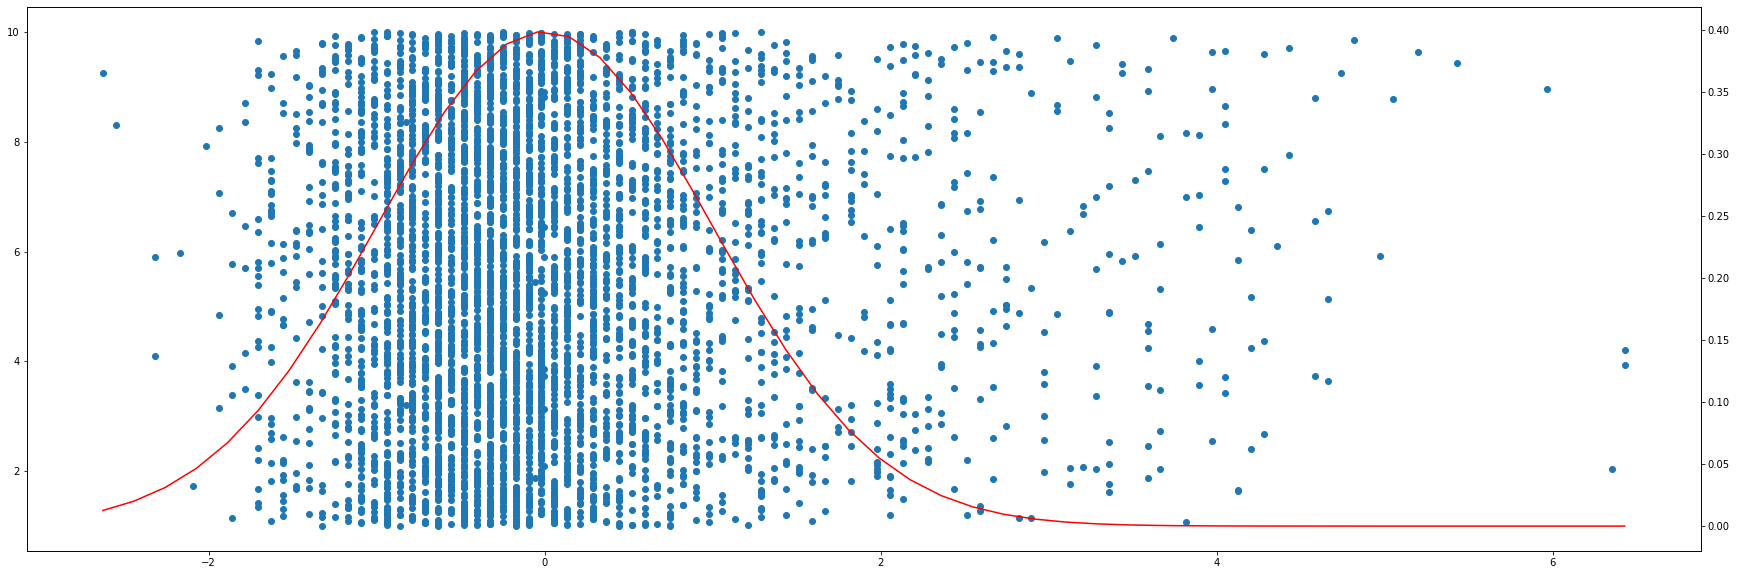

fixed acidity
mean = 4.477352624760894e-16 std = 1.0000000000000002




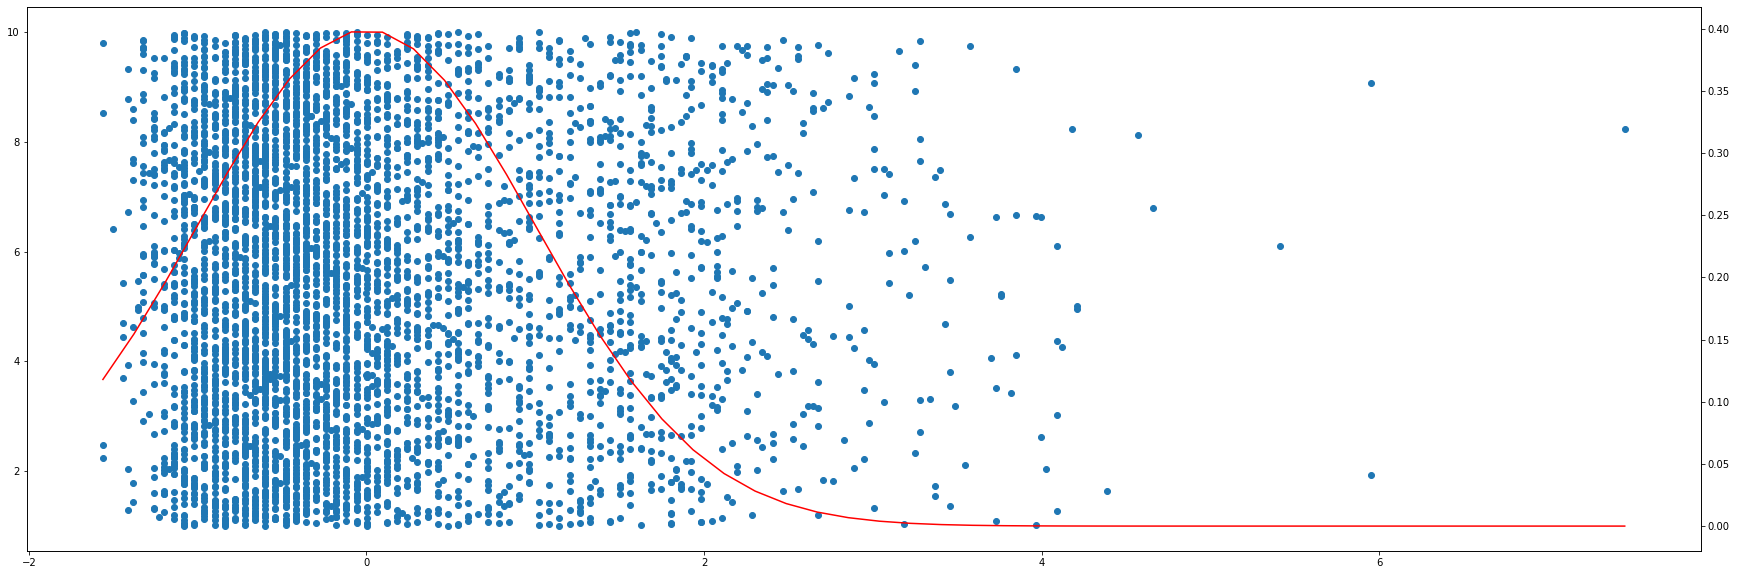

volatile acidity
mean = -1.5969710501997326e-16 std = 0.9999999999999999




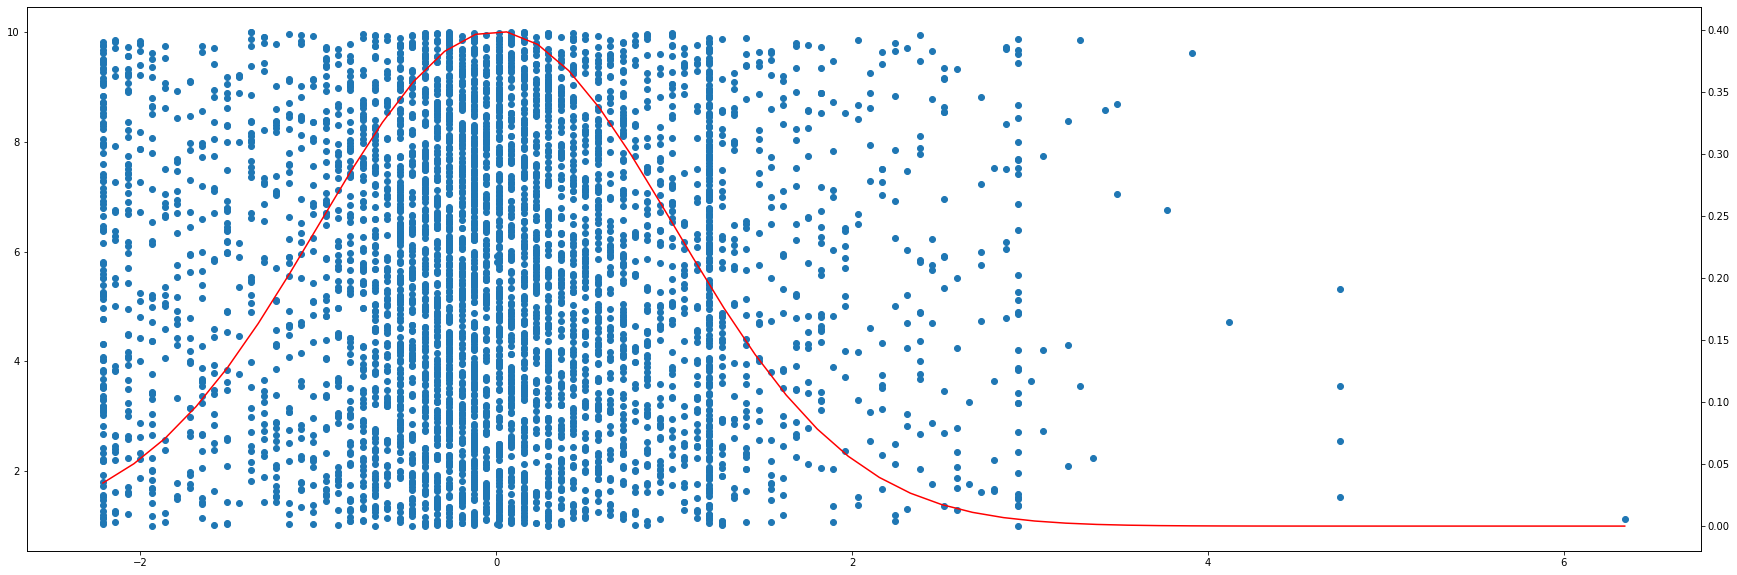

citric acid
mean = 4.0106578886294654e-17 std = 1.0




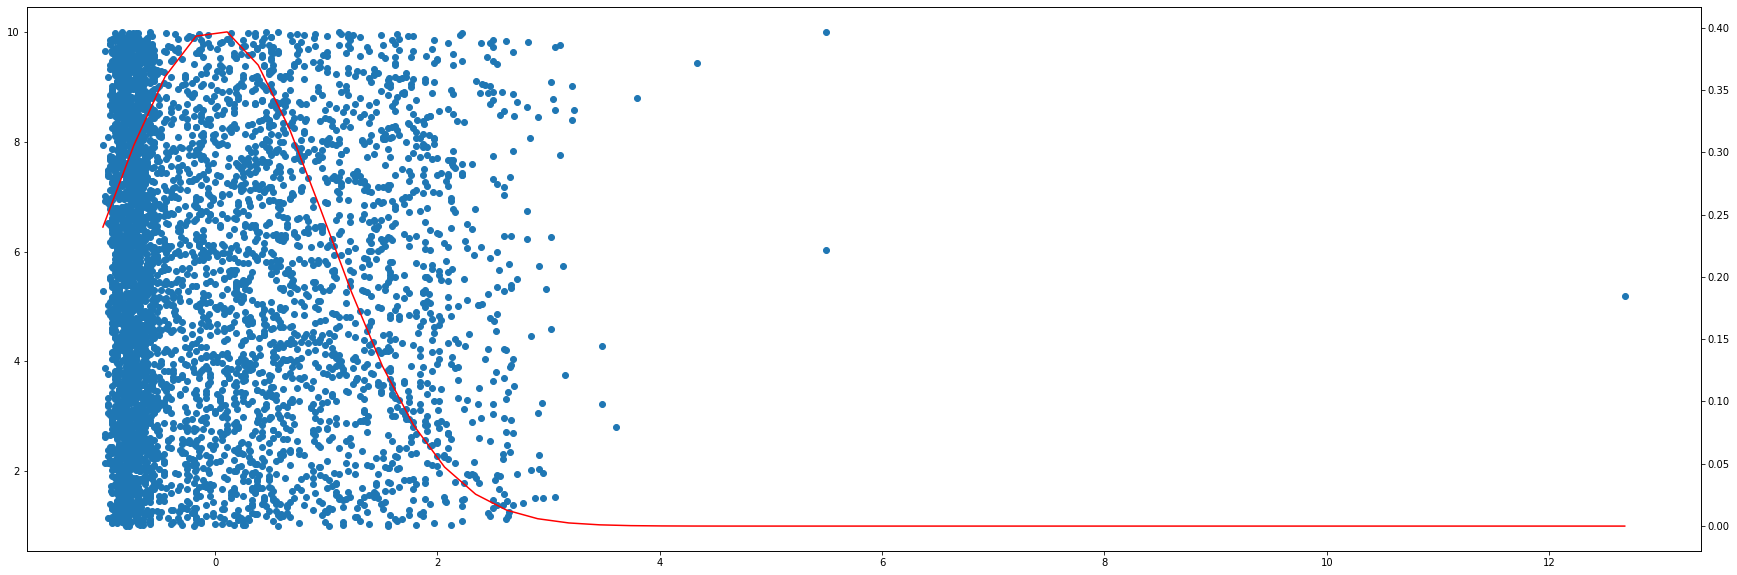

residual sugar
mean = -4.8127894663553587e-17 std = 1.0




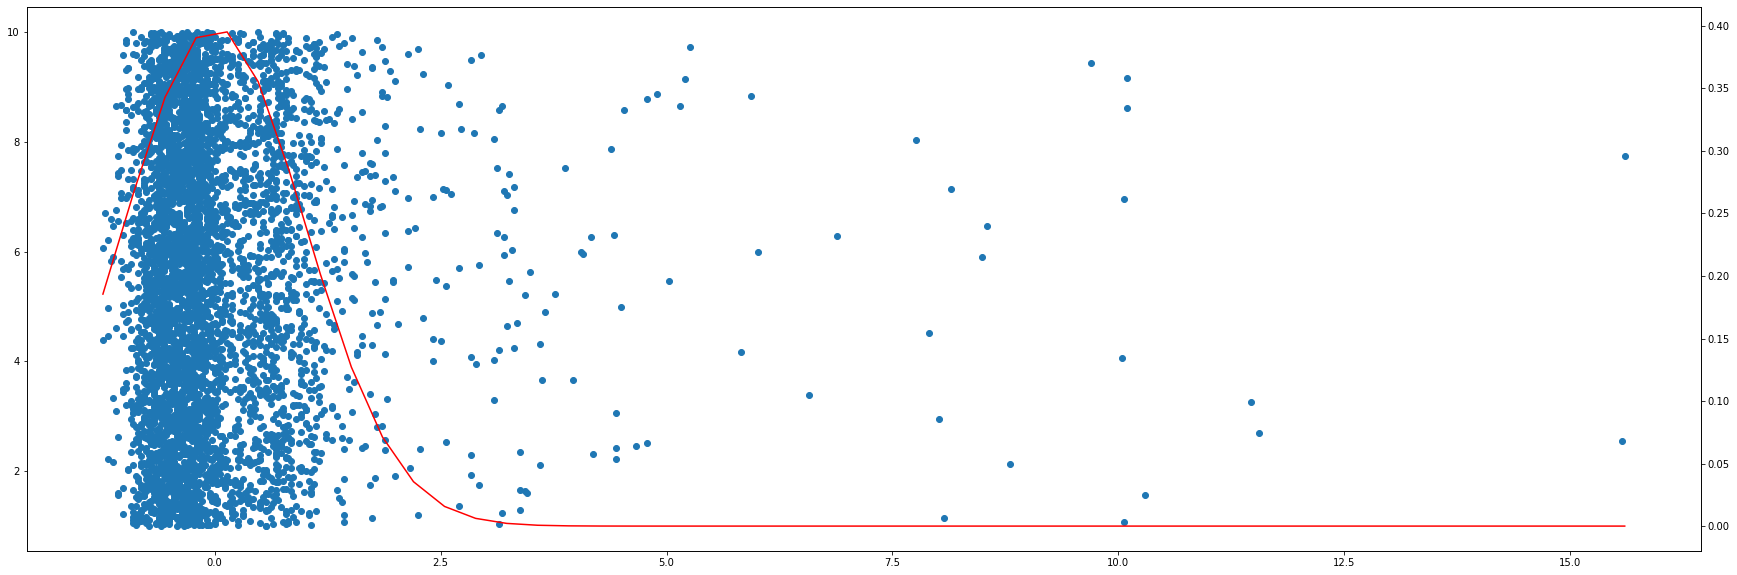

chlorides
mean = 3.2231105214076794e-16 std = 1.0




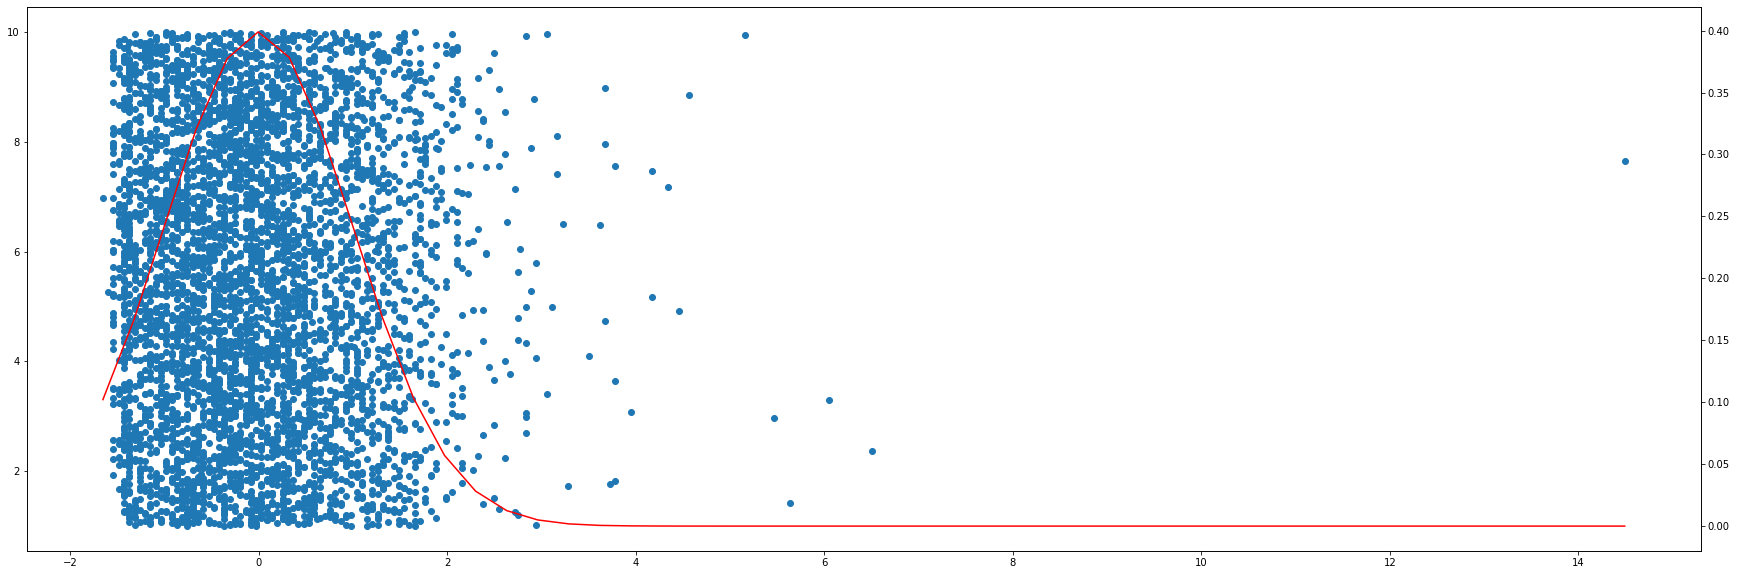

free sulfur dioxide
mean = 7.292105252053573e-17 std = 1.0




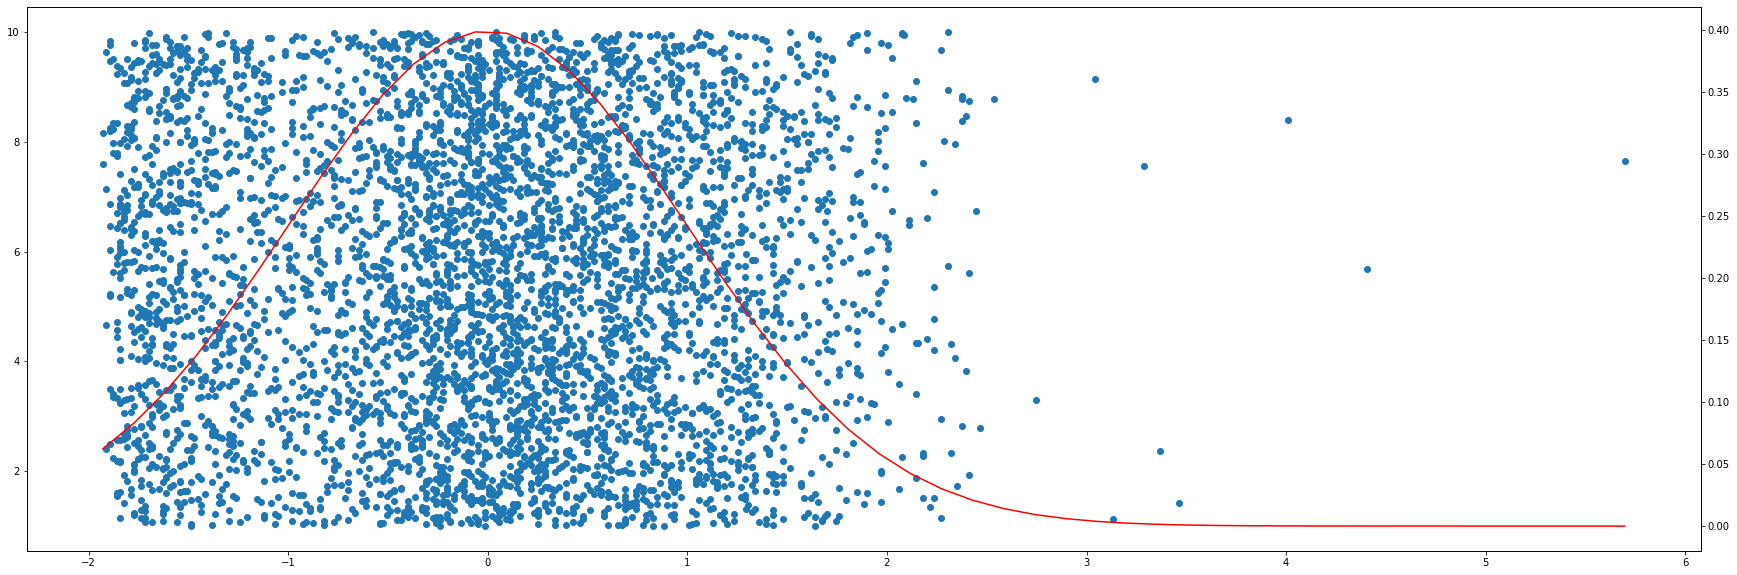

total sulfur dioxide
mean = -3.6460526260267865e-17 std = 1.0




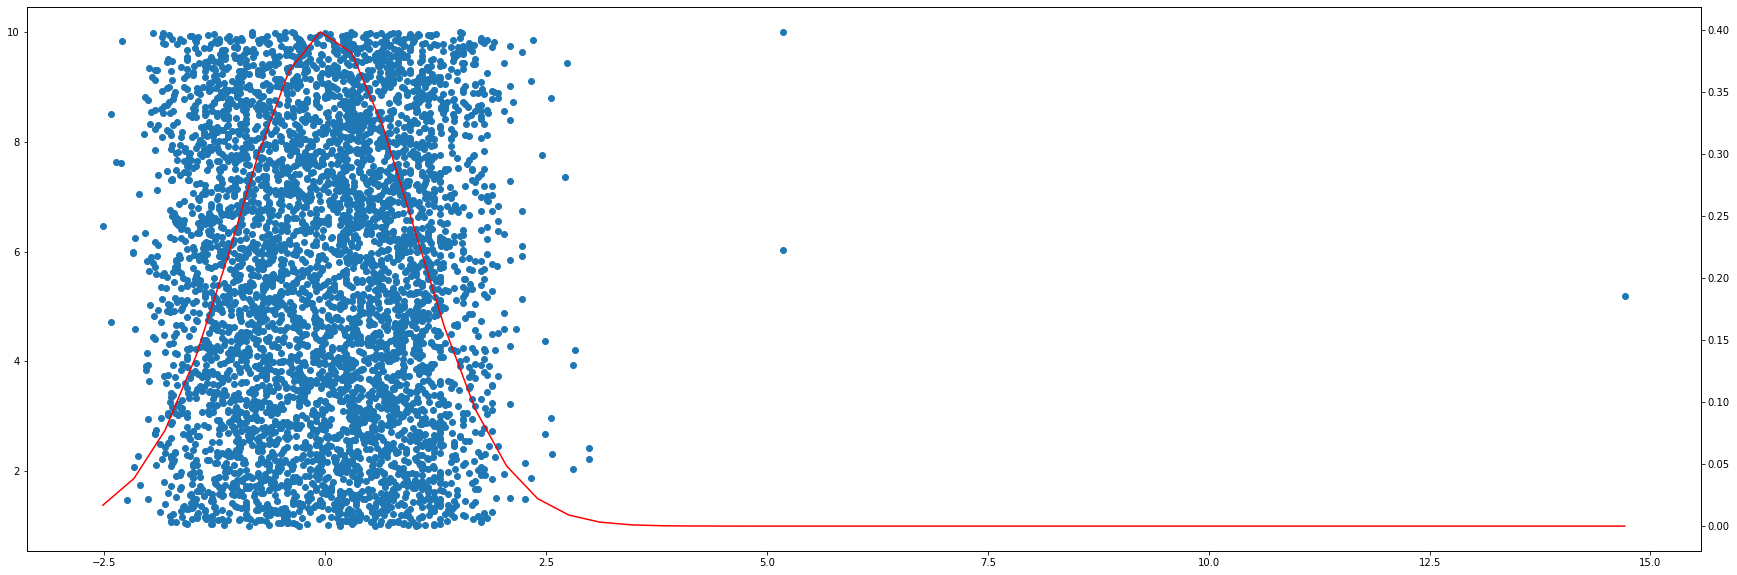

density
mean = 4.1206228358304333e-14 std = 0.9999999999999999




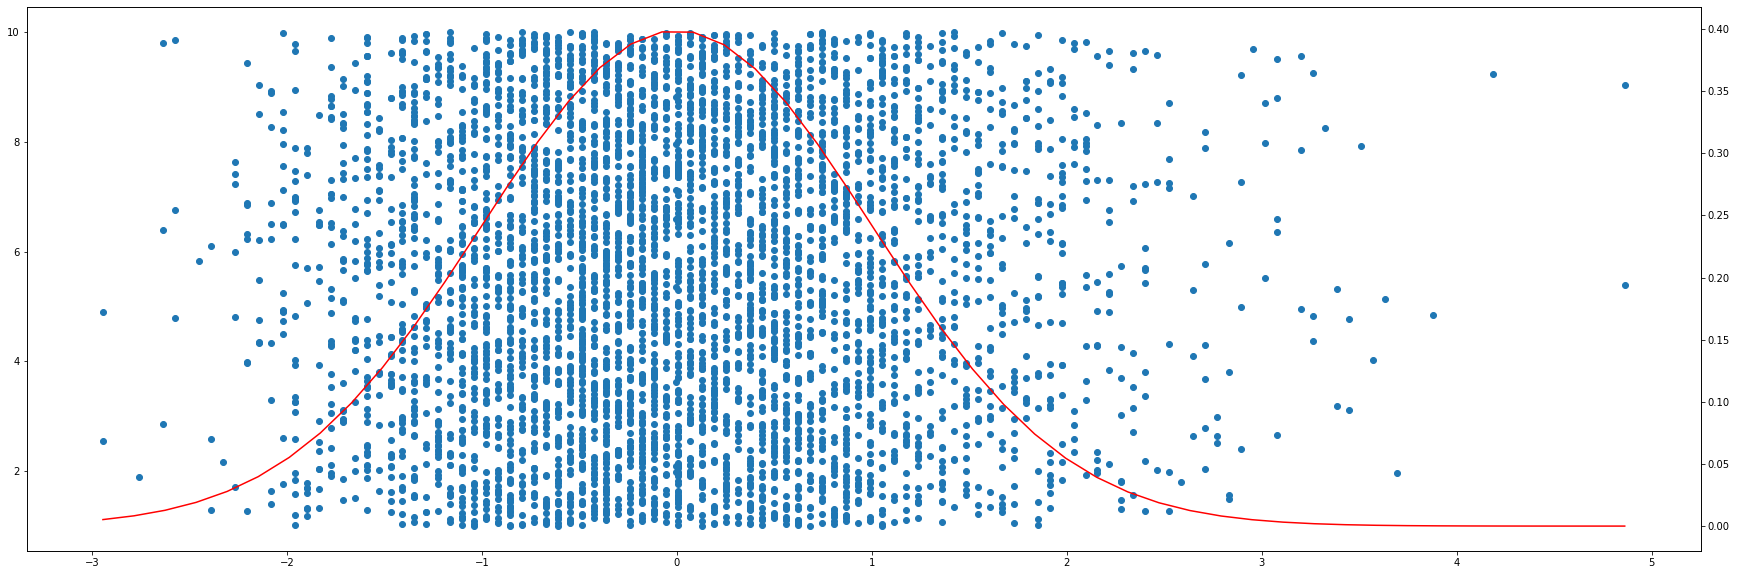

pH
mean = -4.688823677070447e-16 std = 1.0




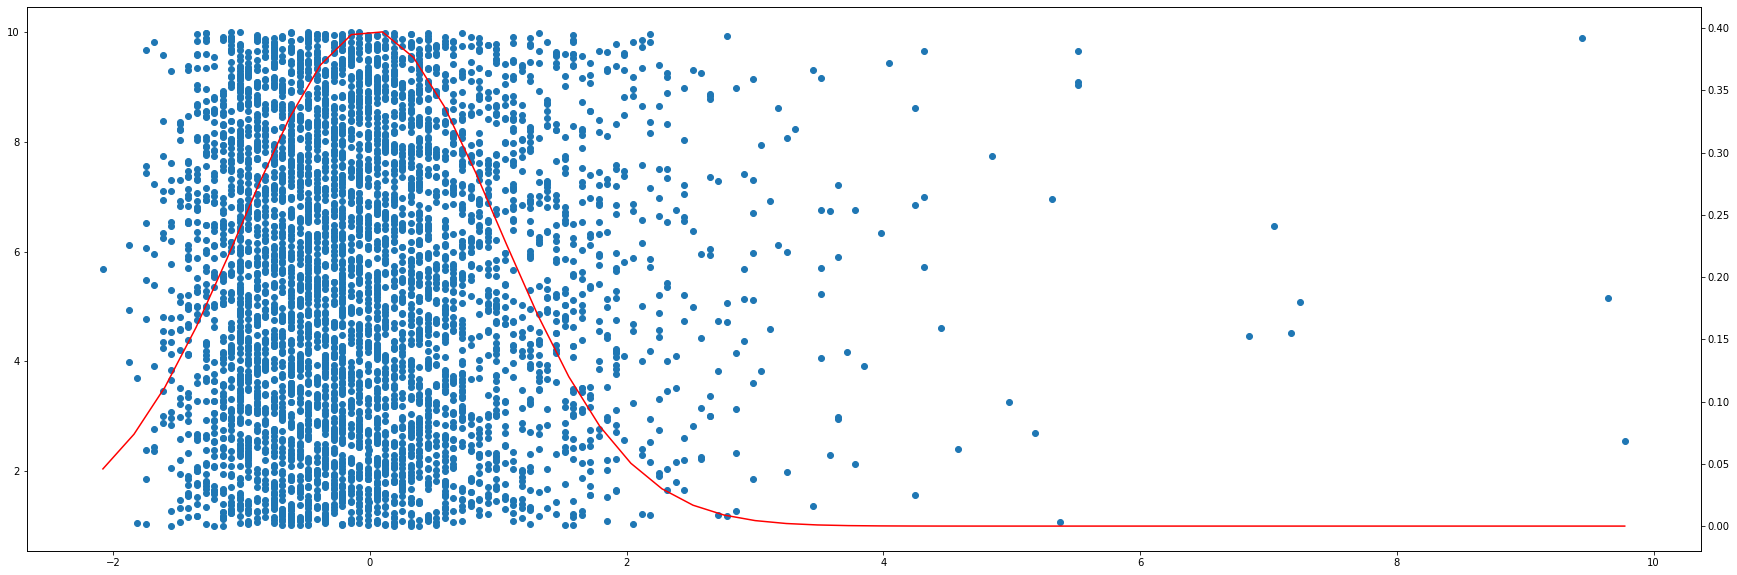

sulphates
mean = -1.640723681712054e-16 std = 1.0




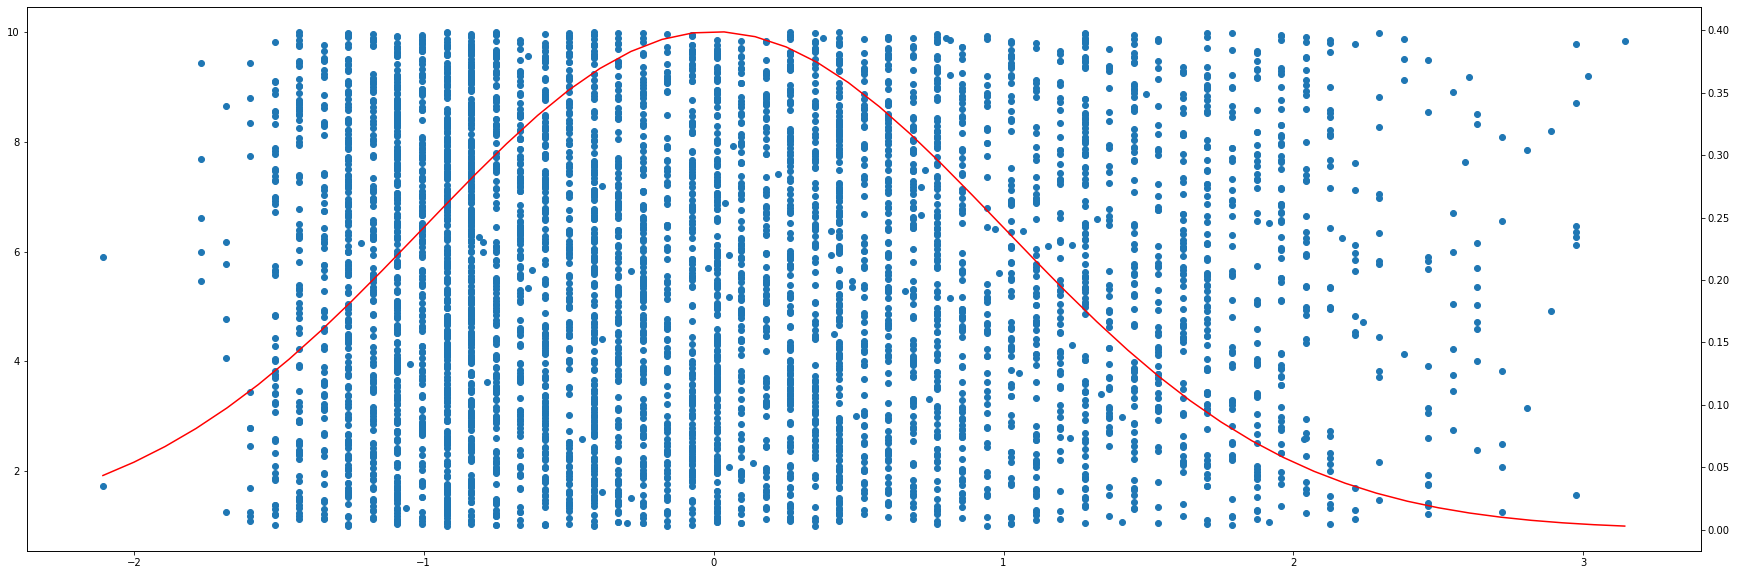

alcohol
mean = -4.185668414678751e-16 std = 1.0




In [ ]:
for name in list(scaled_df):
    fit_and_plot(name, stats.norm, scaled_df[name])

The boxplots to see the outliers

In [ ]:
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df_x.items():
    sns.boxplot(y=col, data=df_x, color='r', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Outlier Detection

The outliers detection using upper and lower quantities:

In [ ]:
def outliers_detection(data):
    data = np.array(data)
    percentile_25 = np.percentile(data, 25)
    percentile_50 = np.percentile(data, 50)
    percentile_75 = np.percentile(data, 75)
    lower_bound = percentile_25 - 1.5 * (percentile_75 - percentile_25)
    upper_bound = percentile_75 + 1.5 * (percentile_75 - percentile_25)
    outliers = []
    for point in list(data):
        if point < lower_bound or point > upper_bound:
            outliers.append(point)
        else:
            outliers.append('not a outlier')
    
    return outliers

In [ ]:
d_outliers_focused = {}
for name in list(df_x):
    d_outliers_focused.setdefault(name, outliers_detection(df_x[name]))
df_outliers_focused = pd.DataFrame(data=d_outliers_focused)
df_outliers_focused.head(5)

fixed acidity volatile acidity  ...      sulphates        alcohol
0  not a outlier    not a outlier  ...  not a outlier  not a outlier
1  not a outlier    not a outlier  ...  not a outlier  not a outlier
2  not a outlier    not a outlier  ...  not a outlier  not a outlier
3  not a outlier    not a outlier  ...  not a outlier  not a outlier
4  not a outlier    not a outlier  ...  not a outlier  not a outlier

[5 rows x 11 columns]

The outliars dataframe. If there is a cell with the outliar value, in the df_outliers_focused dataframe, the whole row (the specific kind of wine) is outliar

In [ ]:
series_list = []
for index, row in df_outliers_focused.iterrows():
    for name in list(df_outliers_focused):
        if type(row[name]) == np.float64:
            series_list.append(row)
            break
            
df_outliers = pd.DataFrame(series_list, columns=list(df_outliers_focused))
df_outliers.describe()

fixed acidity volatile acidity  ...      sulphates        alcohol
count            1471             1471  ...           1471           1471
unique             52               79  ...             49              4
top     not a outlier    not a outlier  ...  not a outlier  not a outlier
freq             1114             1095  ...           1280           1468

[4 rows x 11 columns]

In [ ]:
df_outliers.head(50)

fixed acidity volatile acidity  ...      sulphates        alcohol
0    not a outlier    not a outlier  ...  not a outlier  not a outlier
7    not a outlier    not a outlier  ...  not a outlier  not a outlier
14   not a outlier    not a outlier  ...  not a outlier  not a outlier
17   not a outlier             0.66  ...  not a outlier  not a outlier
20   not a outlier             0.66  ...  not a outlier  not a outlier
23   not a outlier             0.67  ...  not a outlier  not a outlier
38   not a outlier    not a outlier  ...  not a outlier  not a outlier
39   not a outlier    not a outlier  ...  not a outlier  not a outlier
40   not a outlier    not a outlier  ...  not a outlier  not a outlier
41   not a outlier    not a outlier  ...  not a outlier  not a outlier
54   not a outlier    not a outlier  ...  not a outlier  not a outlier
65   not a outlier    not a outlier  ...  not a outlier  not a outlier
67   not a outlier    not a outlier  ...  not a outlier  not a outlier
72   not a outlier    not a outlier  ...  not a outlier  not a outlier
84   not a outlier    not a outlier  ...  not a outlier  not a outlier
85   not a outlier    not a outlier  ...  not a outlier  not a outlier
86   not a outlier    not a outlier  ...  not a outlier  not a outlier
88   not a outlier    not a outlier  ...  not a outlier  not a outlier
89   not a outlier    not a outlier  ...  not a outlier  not a outlier
90   not a outlier    not a outlier  ...  not a outlier  not a outlier
96   not a outlier    not a outlier  ...  not a outlier  not a outlier
98             9.8    not a outlier  ...  not a outlier  not a outlier
99   not a outlier    not a outlier  ...  not a outlier  not a outlier
103  not a outlier    not a outlier  ...  not a outlier  not a outlier
111  not a outlier    not a outlier  ...  not a outlier  not a outlier
115  not a outlier    not a outlier  ...  not a outlier  not a outlier
137  not a outlier    not a outlier  ...  not a outlier  not a outlier
141  not a outlier    not a outlier  ...  not a outlier  not a outlier
169            9.8    not a outlier  ...  not a outlier  not a outlier
174  not a outlier    not a outlier  ...  not a outlier  not a outlier
178  not a outlier             0.67  ...  not a outlier  not a outlier
182  not a outlier    not a outlier  ...  not a outlier  not a outlier
191  not a outlier    not a outlier  ...  not a outlier  not a outlier
194  not a outlier    not a outlier  ...  not a outlier  not a outlier
195  not a outlier    not a outlier  ...  not a outlier  not a outlier
196  not a outlier    not a outlier  ...  not a outlier  not a outlier
207           10.2    not a outlier  ...  not a outlier  not a outlier
221  not a outlier            0.685  ...  not a outlier  not a outlier
225  not a outlier    not a outlier  ...  not a outlier  not a outlier
229  not a outlier    not a outlier  ...  not a outlier  not a outlier
250  not a outlier    not a outlier  ...  not a outlier  not a outlier
261  not a outlier    not a outlier  ...  not a outlier  not a outlier
265  not a outlier    not a outlier  ...  not a outlier  not a outlier
292  not a outlier    not a outlier  ...  not a outlier  not a outlier
296  not a outlier    not a outlier  ...  not a outlier  not a outlier
297  not a outlier    not a outlier  ...  not a outlier  not a outlier
300  not a outlier    not a outlier  ...  not a outlier  not a outlier
302  not a outlier    not a outlier  ...  not a outlier  not a outlier
315  not a outlier    not a outlier  ...  not a outlier  not a outlier
325  not a outlier    not a outlier  ...  not a outlier  not a outlier

[50 rows x 11 columns]

So, it can be seen, for first 50 points, that wines with high residual sugar level can be defined as the outliers, or wines with high chlorides level can be defined as the outliers. The quality median of the outliars is:



In [ ]:
outliers_quality = pd.concat((df_outliers, df['quality']), axis=1).dropna()
quality = list(outliers_quality['quality'])
max(set(quality), key=quality.count)

5

The outliers indices:

In [ ]:
outliers_indices = df_outliers.index.tolist()
print(outliers_indices)

[0, 7, 14, 17, 20, 23, 38, 39, 40, 41, 54, 65, 67, 72, 84, 85, 86, 88, 89, 90, 96, 98, 99, 103, 111, 115, 137, 141, 169, 174, 178, 182, 191, 194, 195, 196, 207, 221, 225, 229, 250, 261, 265, 292, 296, 297, 300, 302, 315, 325, 358, 372, 387, 395, 398, 403, 405, 410, 414, 433, 444, 459, 464, 468, 469, 470, 484, 496, 499, 507, 509, 525, 528, 531, 541, 549, 556, 570, 580, 600, 608, 612, 613, 614, 615, 630, 631, 646, 659, 681, 683, 687, 700, 717, 729, 731, 745, 751, 752, 754, 758, 759, 762, 763, 766, 771, 772, 775, 780, 830, 834, 852, 854, 859, 862, 864, 866, 870, 873, 877, 878, 890, 921, 922, 932, 946, 948, 970, 974, 979, 980, 1014, 1016, 1024, 1034, 1036, 1040, 1043, 1051, 1085, 1104, 1123, 1152, 1158, 1163, 1178, 1185, 1214, 1217, 1239, 1245, 1250, 1254, 1255, 1256, 1257, 1261, 1262, 1263, 1272, 1282, 1293, 1294, 1304, 1307, 1308, 1326, 1332, 1335, 1352, 1369, 1372, 1373, 1385, 1386, 1394, 1401, 1415, 1417, 1418, 1419, 1423, 1436, 1440, 1445, 1454, 1455, 1457, 1458, 1460, 1465, 1476, 148

Removing outliers from the dataset:

In [ ]:
df_x.drop(df_x.index[outliers_indices], inplace=True)
df_y.drop(df_y.index[outliers_indices], inplace=True)
df_x.describe()

fixed acidity  volatile acidity  ...    sulphates      alcohol
count    5026.000000       5026.000000  ...  5026.000000  5026.000000
mean        6.968875          0.298597  ...     0.505080    10.570911
std         0.877765          0.114793  ...     0.116535     1.195765
min         4.700000          0.080000  ...     0.220000     8.400000
25%         6.400000          0.220000  ...     0.420000     9.500000
50%         6.900000          0.280000  ...     0.490000    10.400000
75%         7.500000          0.350000  ...     0.580000    11.400000
max         9.600000          0.655000  ...     0.850000    14.000000

[8 rows x 11 columns]

Checking normality of the cleaned data:

In [ ]:
for name in list(df_x):
    is_normal(np.array(df_x[name]))

4.5028904321642915e-38
False


1.0172705522497969e-143
False


0.00023162634907047058
False


8.764698410458877e-119
False


8.570377133368639e-162
False


2.444474830660082e-43
False


1.3455898907469093e-06
False


3.967444528949049e-140
False


8.976060541504983e-09
False


4.2964454357446375e-54
False


5.7498537801714056e-98
False




Now p-values are much greater, so the features distributions are more close to normal. Checking by standartizing and visualising :

Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=.25, random_state=0)

In [ ]:
np_scaled = standrd_scaler.fit_transform(X_train)
X_train = np_scaled
scaled_df = pd.DataFrame(np_scaled, columns = [name for name in list(X_train)])
X_test = standrd_scaler.transform(X_test)


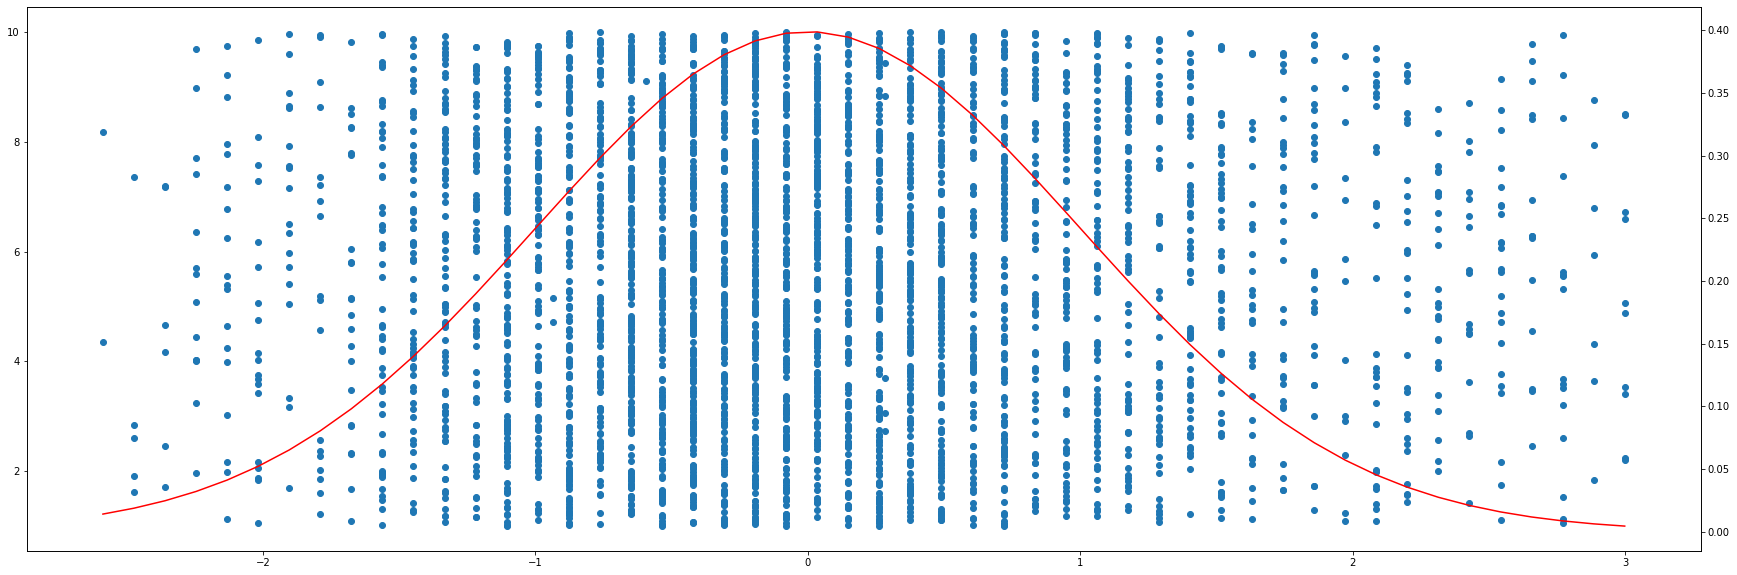

(-1.1053910742160924, -0.5355243748932231, -0.0796310154349273, 0.2622890041587941, 0.718182363617089, -0.8774443944869446, 0.718182363617089, -1.5612844336743883, -0.5355243748932231, -1.1053910742160924, -0.30757769516407524, 0.6042090237525155, 0.1483156642942196, -0.30757769516407524, 0.718182363617089, -0.7634710546223711, -0.1936043552995018, 0.718182363617089, -0.8774443944869446, -0.5355243748932231, -0.4215510350286497, -0.30757769516407524, 0.2622890041587941, -0.8774443944869446, -2.0171777931326833, -0.8774443944869446, 2.7697024811794195, -0.0796310154349273, -0.30757769516407524, 1.2880490629399584, -0.1936043552995018, -1.1053910742160924, -0.4215510350286497, -0.4215510350286497, -0.1936043552995018, -1.3333377539452405, 2.0858624419919765, -0.5355243748932231, 0.718182363617089, -1.6752577735389618, 1.971889102127401, -0.30757769516407524, 0.2622890041587941, -0.30757769516407524, 0.37626234402336756, 0.1483156642942196, 0.49023568388794203, 2.5417558014502704, -0.9914

(-0.3253904268154267, -0.15035114272327735, -0.3253904268154267, 2.387718476612885, 0.9874042038756918, 0.2872470675070955, -0.06283150067720317, -0.5441895319306134, -0.3253904268154267, -0.237870784769352, -0.15035114272327735, 0.0246881413688715, -0.5879493529536505, 1.0749238459217665, 0.11220778341494617, -0.5879493529536505, -0.41291006886150133, 0.7248452777374683, 1.425002414106065, -0.15035114272327735, -1.550665415460471, 0.11220778341494617, 0.549805993645319, 0.0246881413688715, -0.7629886370457998, -0.7629886370457998, 0.8998845618296176, 0.37476670955317015, 2.825316686843258, 0.37476670955317015, 2.912836328889333, -0.8505082790918742, 0.19972742546102082, -0.500429710907576, -0.5879493529536505, 0.0246881413688715, -0.237870784769352, 0.19972742546102082, -0.8505082790918742, -1.2005868472761725, 1.0749238459217665, 0.9874042038756918, -0.5879493529536505, -0.500429710907576, -0.9380279211379489, 0.11220778341494617, 0.0246881413688715, 1.1624434879678411, -0.4129100688

(-0.2682387219330679, 0.23182562220876848, -0.06821298427633335, -2.6685475738138806, -0.7683030660749037, -1.7684317543585755, -0.2682387219330679, -0.2682387219330679, -0.06821298427633335, 0.031799884552033926, 1.0319285728357057, -1.0683416725600052, -0.16822585310470065, 1.4319800481491747, 1.732018654634276, 0.13181275338040122, -0.7683030660749037, -0.36825159076143466, -0.6682901972465365, -0.6682901972465365, -0.6682901972465365, -0.16822585310470065, 1.4319800481491747, 0.031799884552033926, -0.06821298427633335, -0.4682644595898019, -0.06821298427633335, 0.4318513598655025, -1.0683416725600052, -0.36825159076143466, -2.4685218361571457, -0.6682901972465365, 1.5319929169775415, -0.36825159076143466, 0.13181275338040122, 0.6318770975222371, 0.7318899663506043, 1.3319671793208074, 0.7318899663506043, -0.9683288037316381, 1.3319671793208074, -0.7683030660749037, 0.7318899663506043, 0.031799884552033926, -0.6682901972465365, -1.468393147873474, 0.031799884552033926, 1.73201865463

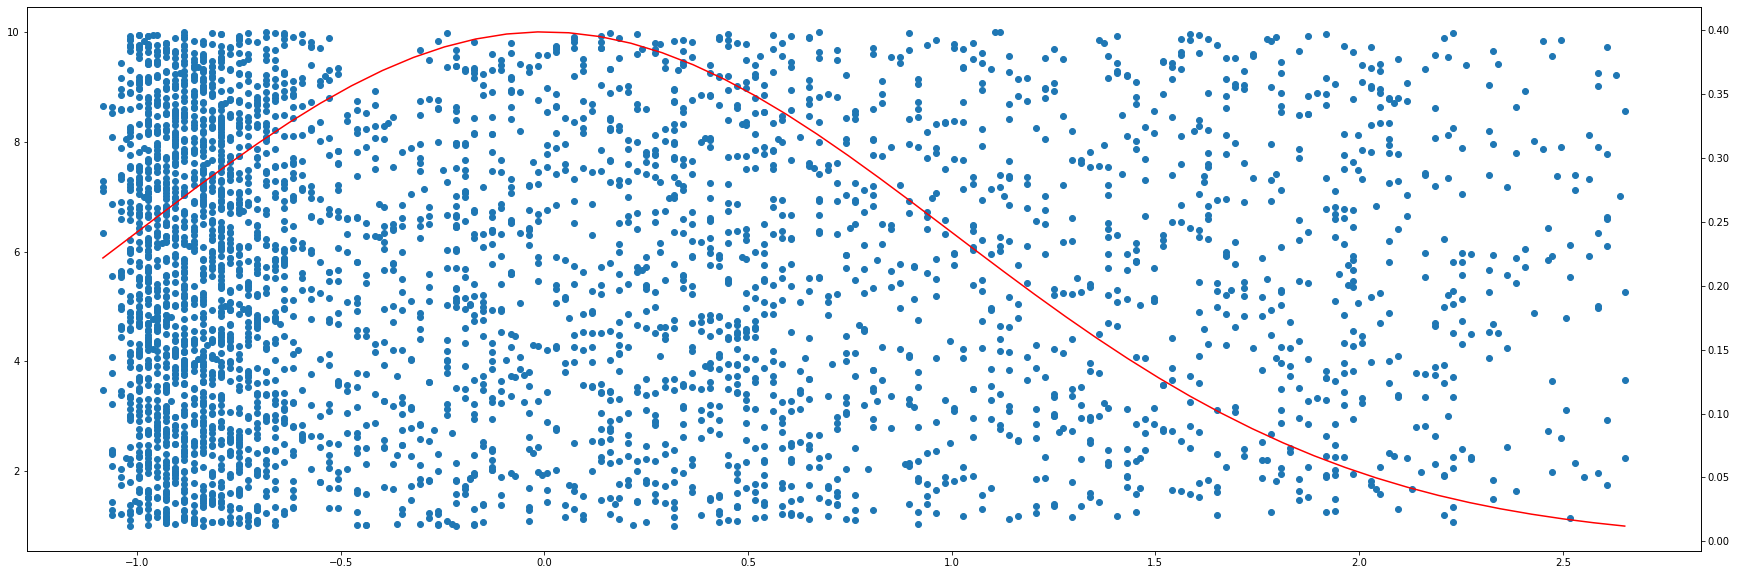

(-1.0166750726436706, -0.21620977596953722, 0.31743375514655187, -0.7276181599557892, -0.8387938956049744, -0.1717394817098631, -0.26068007022921114, -0.9722047783839965, -0.4385612472679076, -0.4385612472679076, -0.4607963943977446, 0.21737559306228516, -0.660912718566278, 0.9177827276521519, -0.3607382323134779, -0.9054993369944855, -0.2273273495344557, -0.3051503644888853, -0.26068007022921114, -0.1717394817098631, -0.9277344841243227, -0.7053830128259522, -0.7720884542154632, -0.8610290427348114, -0.8610290427348114, -0.8610290427348114, -0.7498533070856261, -0.9277344841243227, -0.8165587484751373, 0.4286094907957371, -0.7720884542154632, -0.7943236013453002, 2.2296564083125374, 0.2507283137570408, -0.8165587484751373, -0.14950433458002593, -0.7943236013453002, 0.4730797850554112, -0.660912718566278, -0.23844492309937418, -0.7053830128259522, -0.03832859893084072, -0.7276181599557892, 0.7621366977432927, -0.9277344841243227, -1.0166750726436706, -0.8610290427348114, -0.70538301282

(-0.9393267409342799, 0.41144828122069893, -0.5095346884304232, 2.069217626592718, 2.0078187619493097, 0.2886505519338826, 0.227251687290474, -0.018343771283158252, -1.0621244702210964, -0.7551301470040555, -0.7551301470040555, -1.3077199287947285, -0.8165290116474636, 0.41144828122069893, -0.20254036521338234, -0.6937312823606473, 0.35004941657729033, -1.1235233348645044, 1.1482346569415962, -1.1235233348645044, -0.5095346884304232, -0.5709335530738314, 1.6394255740888615, -0.9393267409342799, 0.04305509336024992, -0.5709335530738314, 2.6218074083833907, -0.9393267409342799, 1.9464198973059015, -0.44813582378701505, 2.560408543739983, -0.3867369591436073, 0.9640380630113716, -0.9393267409342799, -0.018343771283158252, -0.5095346884304232, 3.2357960548174725, -1.553315387368361, -0.20254036521338234, -1.0621244702210964, 1.5166278448020452, -0.7551301470040555, -0.8779278762908718, -1.4919165227249531, 0.227251687290474, -0.3253380945001987, -1.0621244702210964, 2.376211949809758, 0.28

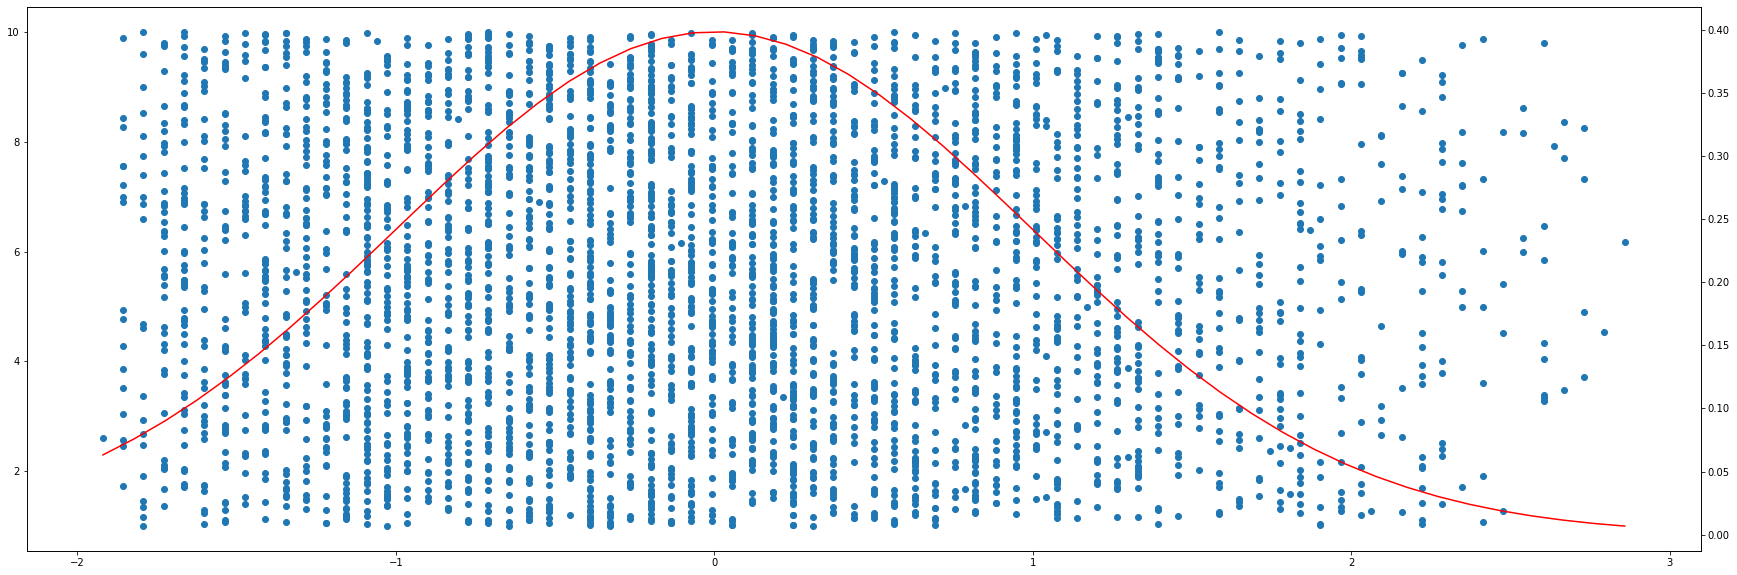

(-0.32691477077939285, -0.6454952266350995, 0.3102461409320204, -1.0277917736619475, -1.7923848677156433, -0.32691477077939285, -0.3906308619505342, 0.05538177624745509, 0.24653004976087908, 0.24653004976087908, 0.6925426879588684, 0.05538177624745509, 1.9031484202105535, 2.22172887606626, -0.32691477077939285, -1.0915078648330887, 0.5651105056165857, -1.6012365942022195, 1.9031484202105535, 1.393419690841423, -0.7092113178062408, -0.1357664972659689, -0.5180630442928169, -0.1357664972659689, -0.9640756824908061, 0.5651105056165857, -1.2189400471753715, -1.2189400471753715, -1.5375205030310781, 2.412877149579684, -1.3463722295176541, -0.1357664972659689, -0.32691477077939285, -0.3906308619505342, -0.7729274089773822, -0.6454952266350995, -0.7729274089773822, -0.07205040609482756, -0.1357664972659689, -0.1357664972659689, -0.008334314923686236, 0.05538177624745509, -0.19948258843711023, -0.7729274089773822, 0.5651105056165857, -0.7092113178062408, -0.5817791354639582, -0.581779135463958

(-0.5841455356392771, 0.10015128777426521, 1.0058382599392477, -1.791728165192587, -2.2948875941731326, 0.05989853345582155, 0.4221733223218145, 0.03977215629659972, -0.6646510442761644, 0.1605304192519307, -0.4030081412062806, 0.361794190844149, 0.46242607664025814, 2.1932945123333356, 0.12027766493348704, -0.4030081412062806, 1.7303878376712336, -0.2621235010917278, 1.6498823290343463, 0.05989853345582155, 0.12027766493348704, -0.8457884387091609, -1.6307171479188123, 0.10015128777426521, -1.288568736212041, 0.5026788309587018, -1.2684423590528193, 0.40204694516259265, -1.2684423590528193, 2.1127890036964483, -1.6307171479188123, -0.6042719127984989, 0.9655855056208039, -0.6847774214353862, -0.4835136498431679, -0.7854093072314954, -1.9728655596255833, -0.5640191584800552, 1.1064701457353567, -0.4633872726839461, -1.3288214905304847, -0.20174436961406225, -0.4633872726839461, -0.32250263256939327, -0.36275538688783693, 0.3819205680033708, 0.05989853345582155, -0.18161799245484042, 2.

(-1.629633921371308, -0.792344612061061, -0.1347311201993095, 0.5408499534072158, 0.7420868689495994, 0.22102699834880668, -0.0844218913137435, -1.126541632515369, -1.3924618423392174, -0.7132872523836974, -1.410429424084071, -0.6090752782635309, -1.05107778918696, 1.5614085965149929, -1.0546713055359547, -1.126541632515369, 0.49054072452164976, -1.2702822864741972, -0.0844218913137435, -1.2199730575886312, -1.076232403629803, -1.963830941825616, 0.4330444629380945, -1.0906064690256618, -1.654788535814151, -0.30003287225202596, 0.8858275229084677, -0.716880768732692, 1.0295681768672962, 0.5192888553133675, 0.4186703975421957, -1.2055989921927723, 1.647652988890346, -0.86780845538943, -0.9828009785565405, -1.6188533723244438, 0.476166659125751, -1.0043620766503487, -0.01255156433432931, -0.12035705480345059, 0.7313063199027352, -1.4499581039227727, -1.198411959494783, -0.5443919839820262, -0.11317002210550119, -0.3934642973252883, -0.4437735262108543, 1.2451791578055784, 0.5264758880113

(1.135835460366858, -0.07441078404629657, 0.7324200455624721, 1.135835460366858, 0.4634764356928815, -0.007174881578900434, -0.3433543939158871, 0.8668918504972674, 0.06006102088849869, 0.12729692335589485, -0.20888258898109185, -1.9570160531334304, -1.2174211259920578, 0.12729692335589485, -0.8812416136550681, 0.7324200455624721, 1.0685995578994618, -1.4191288333942493, 0.2617687282906901, -0.276118491448491, -0.07441078404629657, -0.8140057111876721, 1.2703072653016532, 0.4634764356928815, 0.19453282582329395, 1.8754303875082334, -0.9484775161224673, -0.9484775161224673, 2.0771380949104246, -0.4778261988506824, 1.7409585825734382, 0.39624053322548536, -0.20888258898109185, -0.5450621013180815, -0.7467698087202729, 0.12729692335589485, -0.41059029638328626, -0.07441078404629657, 1.673722680106039, 0.19453282582329395, 0.7996559480298712, -0.6122980037854776, 0.3290046307580862, 0.8668918504972674, 2.144373997377821, -0.5450621013180815, -0.276118491448491, 0.12729692335589485, -0.3433

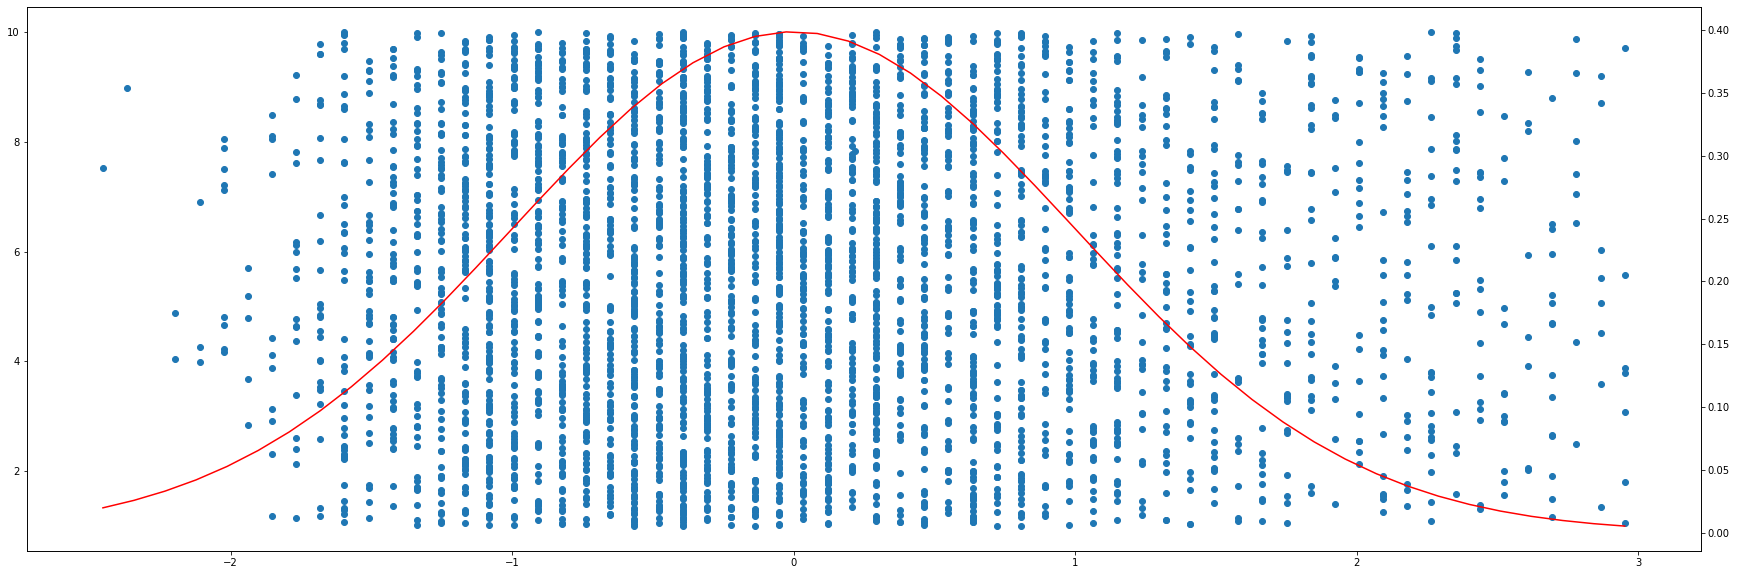

(-0.565932191104492, -0.3943114805612665, -0.13688041474642884, 0.8070334932413102, 0.7212231379696975, -0.22269077001804155, -0.9949839674625551, -0.051070059474816104, 0.9786542037845357, -0.3943114805612665, -1.0807943227341679, -1.338225388549006, 0.4637920721548603, -0.051070059474816104, 1.4077059801425993, -0.7375529016477175, 1.4077059801425993, -0.8233632569193302, 0.12055065106840936, -0.565932191104492, -0.48012183583287926, -1.2524150332773933, 2.9522923750316266, -0.8233632569193302, -1.1666046780057806, 1.7509474012290493, 1.0644645590561483, 0.12055065106840936, 0.6354127826980848, 0.37798171688324755, 0.37798171688324755, 0.4637920721548603, 0.4637920721548603, -1.5956564543638438, -0.3943114805612665, 0.6354127826980848, 1.5793266906858239, 1.6651370459574366, -0.565932191104492, -1.2524150332773933, 2.2658095328587256, -0.565932191104492, 0.2921713616116348, -1.338225388549006, 1.3218956248709866, -0.9091736121909424, 1.3218956248709866, 1.150274914327761, -0.30850112

(1.4549898713163878, 1.203998657840714, 0.7020162308893679, -0.2182848851881, -0.8875947877898956, -0.9712585256151197, -0.3019486230133256, 0.3673612795884701, 1.70598108479206, 0.20003380393802195, 1.3713261334911622, 0.4510250174136942, 0.6183524930641439, -1.3059134769160177, 1.8733085604425097, 0.5346887552389183, -0.8875947877898956, 1.70598108479206, -0.6366035743142219, 1.3713261334911622, 0.5346887552389183, 1.8733085604425097, 0.3673612795884701, 0.5346887552389183, 1.203998657840714, -0.050957409537651814, -0.050957409537651814, -0.6366035743142219, -1.054922263440344, -0.6366035743142219, -0.1346211473628759, 0.4510250174136942, -1.3059134769160177, 1.4549898713163878, 0.4510250174136942, 2.1242997739181817, 0.5346887552389183, 1.789644822617284, 0.20003380393802195, -0.9712585256151197, 1.203998657840714, 1.9513947129572613, 1.4549898713163878, 1.70598108479206, -0.050957409537651814, -0.8039310499646716, 0.283697541763246, -0.8875947877898956, -1.3895772147412417, 1.62231

In [ ]:
for name in list(scaled_df):
    fit_and_plot(name, stats.norm, scaled_df[name])

In [ ]:
print(X_train)
print(X_test)

[[-1.10539107 -0.32539043 -0.26823872 ...  1.13583546 -0.56593219
   1.45498987]
 [-0.53552437 -0.15035114  0.23182562 ... -0.07441078 -0.39431148
   1.20399866]
 [-0.07963102 -0.32539043 -0.06821298 ...  0.73242005 -0.13688041
   0.70201623]
 ...
 [ 0.71818236 -0.32539043  0.43185136 ... -0.4105903  -0.90917361
  -0.13462115]
 [-0.07963102  0.02468814 -0.16822585 ... -0.94847752 -1.59565645
   1.78964482]
 [ 0.49023568 -0.58794935  0.6318771  ... -1.01571342 -0.39431148
  -0.21828489]]
[[ 0.14831566 -1.37562613  0.13181275 ... -0.14164669  1.15027491
   0.78567997]
 [ 0.262289   -1.20058685  0.33183849 ...  0.79965595 -1.42403574
  -0.55293984]
 [ 1.51599574  0.28724707  1.03192857 ...  1.13583546  2.26580953
   1.78964482]
 ...
 [-0.19360436  0.02468814  0.33183849 ... -0.81400571  0.20636101
   1.20399866]
 [ 1.06010238  0.41852653  1.93204439 ... -0.81400571  0.0347403
  -1.22224974]
 [ 0.71818236 -0.32539043  0.03179988 ... -1.68807244 -0.39431148
   1.20399866]]


Training the Decision Tree Classification model on the Training set

In [ ]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.20      0.22      0.21        37
           5       0.64      0.58      0.60       363
           6       0.67      0.69      0.68       581
           7       0.60      0.59      0.60       239
           8       0.31      0.47      0.38        34
           9       0.00      0.00      0.00         2

    accuracy                           0.62      1257
   macro avg       0.35      0.36      0.35      1257
weighted avg       0.62      0.62      0.62      1257



In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 61.81%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  0   0   0   1   0   0   0]
 [  0   8  15  13   1   0   0]
 [  2  18 209 108  21   5   0]
 [  0  11  91 403  60  15   1]
 [  0   3  14  66 141  15   0]
 [  0   0   0   8  10  16   0]
 [  0   0   0   1   1   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.20      0.22      0.21        37
           5       0.64      0.58      0.60       363
           6       0.67      0.69      0.68       581
           7       0.60      0.59      0.60       239
           8       0.31      0.47      0.38        34
           9       0.00      0.00      0.00         2

    accuracy                           0.62      1257
   macro avg       0.35      0.36      0.35      1257
weighted avg       0.62      0.62      0.62      1257

